# Statistics about the costs of nuclear accidents that happened before the Three Mile Island disaster.



In [10]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

Q1) First we load the data in the vector x. 

In [11]:
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv ('data.csv')

# Rewrite each date with a python-friendly format.
for k in range (len(df['Date'])):
    date = df['Date'][k]
    date =date.split('/')

    year = date[2]

    day = date[1]
    if len(day)==1:
        day = '0' + day

    month = date[0]
    if len(month)==1:
        month = '0' + month

    date = year + '-' + month + '-' + day

    df['Date'][k] = date

# We drop every disaster that happened before the Three Mile Island accident.
df = df[df['Date'] < '1979-03-28']

# We then just select the costs
df = df['Cost (millions 2013US$)']
x=df.dropna(axis=0, how='any', )
# We convert the pandas table into a python list.
x = x.tolist()

print("List of each cost =", x)
print("Lenght of the list : n =", len(x))


List of each cost = [8189.0, 4400.0, 3500.0, 2900.0, 2500.0, 1964.5, 1900.0, 1733.4, 1500.0, 1330.0, 1300.0, 1100.0, 1100.0, 990.0, 800.0, 793.9, 788.4, 541.4, 511.5, 425.2, 277.1, 180.0, 150.0, 100.0, 100.0, 99.5, 98.0, 89.9, 87.7, 84.5, 77.0, 60.1, 52.4, 38.0, 37.5, 25.7, 25.7, 17.1, 16.1, 15.0, 13.9, 11.8, 11.4, 6.1, 4.4, 1.2, 1.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Lenght of the list : n = 55


Q2) a)

First, we note that if $X \sim  \mathcal{N}(0,1)$ and $Y=\sigma X+\mu$ then $Y \sim  \mathcal{N}(\mu,\sigma^2)$

By definition, let $p\in[0,1]$. Since the gaussian cumulative distribution function is stricly increasing,

$\exists! y\in\mathbb{R}$ such that : $F^{-1}_{Y}(p) = y$ and we have $p=\mathcal{P}(Y\leq y)=\mathcal{P}(Y\leq F^{-1}_{Y}(p))$.

 $p=\mathcal{P}(Y\leq y)= \mathcal{P}(Y\leq F^{-1}_{Y}(p)) = \mathcal{P}(\sigma X + \mu\leq F^{-1}_{Y}(p)) = \mathcal{P}( X\leq \frac{F^{-1}_{Y}(p)-\mu}{\sigma}) = \mathcal{P}(X\leq F^{-1}_{X}(p))=p$

Since the two cumulative distribution are stricly increasing, we can identify the two terms :

Hence,  $\forall p\in[0,1], F^{-1}_{X}(p) = \frac{F^{-1}_{Y}(p)-\mu}{\sigma}$ 

Or $F^{-1}_{X}(p) = F^{-1}_{(0,1)}(p)$ and $F^{-1}_{Y}(p) = F^{-1}_{(\mu,\sigma^2)}(p) = F^{-1}_{(\theta)}(p)$

Hence : $\forall p\in[0,1],F^{-1}_{(\theta)}(p) = \sigma\cdot F^{-1}_{(0,1)}(p) + \mu$

$\square$

Q2) b) We can compute the Q-Q plot for the Gaussian Model by using problot function of Scipy :

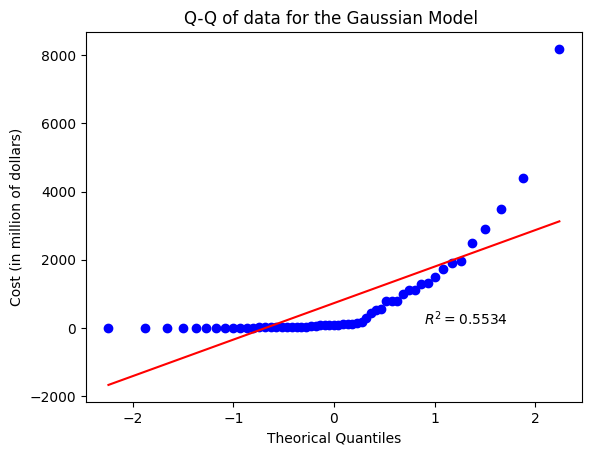

In [12]:
import scipy
from scipy import stats
import matplotlib.pyplot as plt

scipy.stats.probplot(x, sparams=(), dist='norm', fit=True, plot=plt, rvalue=True)

plt.title("Q-Q of data for the Gaussian Model ")
plt.xlabel("Theorical Quantiles")
plt.ylabel("Cost (in million of dollars)")
plt.show()


We can see the Q-Q plot isn't well approximated by a line.

Q3) a)

First, we note that if $X \sim \mathcal{E}(1)$ and $Y= \frac{X}{\theta}$, then $Y \sim \mathcal{E}(\theta)$

By definition, let $p\in[0,1]$. Since the exponential cumulative distribution function is stricly increasing,

$\exists y\in\mathbb{R}$ such that : $F^{-1}_{Y}(p) = y$ and we have $p=\mathcal{P}(Y\leq y)=\mathcal{P}(Y\leq F^{-1}_{Y}(p))$.

$p=\mathcal{P}(Y\leq y)= \mathcal{P}(Y\leq F^{-1}_{Y}(p)) = \mathcal{P}( \frac{X}{\theta}\leq F^{-1}_{Y}(p)) = \mathcal{P}( X\leq \theta F^{-1}_{Y}(p)) = \mathcal{P}(X\leq F^{-1}_{X}(p))=p$

Since the two cumulative distribution are stricly increasing, we can identify the two terms :

Hence, $\forall p\in[0,1], F^{-1}_{X}(p) = \theta F^{-1}_{Y}(p)$ 

Or, $F^{-1}_{X}(p) = F^{-1}_{1}(p)$ and $F^{-1}_{Y}(p) = F^{-1}_{\theta}(p)$

Hence, $\forall p\in[0,1], F^{-1}_{\theta}(p) = \frac{F^{-1}_{1}(p)}{\theta}$ 

$\square$


Q3) b) We can compute the Q-Q plot for the Exponential Model by using problot function of Scipy :

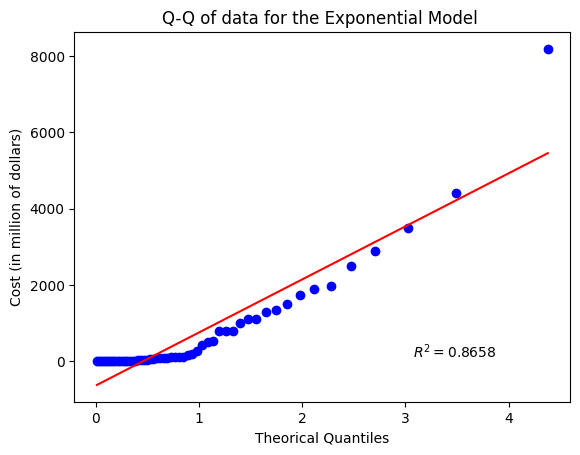

In [13]:
import scipy
from scipy import stats
import matplotlib.pyplot as plt

scipy.stats.probplot(x, sparams=(), dist='expon', fit=True, plot=plt, rvalue=True)

plt.title("Q-Q of data for the Exponential Model ")
plt.xlabel("Theorical Quantiles")
plt.ylabel("Cost (in million of dollars)")
plt.show()


We can see the Q-Q plot is well approximated by a line. It is not perfect but it is better than the Gaussian Model.

Q4)

For the gaussian model, we can see that the Q-Q plot of data isn't well approximated by a line. Therefore, this suggests that the observations don't have a normal distribution.

For the exponential model, we can see that the Q-Q plot of data is well approximated by a line. Therefore, this suggests that the observations can be approximated by a exponential distribution.

That is what the statement of the project assumes from here.


## Exercise 2 :

Q1)

We have that $X_1$,...$X_n$ $\overset{iid}{\sim}$ $\mathcal{E(\theta)}$.

Hence, $p_\theta(X) = \prod\limits_{i=1}^n f^{X_i}_{\theta}(x_i) = \prod\limits_{i=1}^n \theta\cdot e^{-\theta\cdot x_i} = \theta^n \cdot e^{(-\theta\cdot \sum\limits_{i=1}^n x_i)}$ 

Or, $\hat{\theta} = \underset{\theta \in \mathbb{R^*_+}}{\operatorname{argmax}} (ln(p_\theta(X)))$

$ln(p_\theta(X)) = nln(\theta) - \theta\cdot S$ where $S=\sum\limits_{i=1}^n x_i$

$\frac{dln(p_\theta(X))}{d\theta}|_{\hat{\theta}} = \frac{n}{\hat{\theta}} - S = 0$

Hence, $\hat{\theta} = \frac{n}{\sum\limits_{i=1}^n x_i}$ is the MLE of $\theta$.

$\square$






Q2)

[1.37677259e-03 1.37487840e-03 1.37298680e-03 ... 5.74557265e-09
 5.73766774e-09 5.72977372e-09]


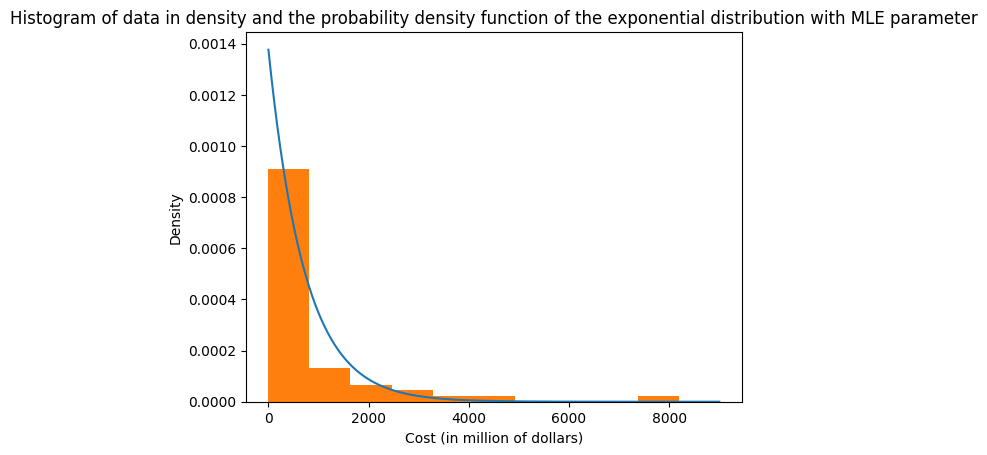

In [14]:
S = np.sum(x)
MLE = len(x)/S

def exp_dens(x):
    return( MLE * np.exp( - MLE * x ) )

x_array = np.arange(0,9000,1)
y_array = exp_dens(x_array)

print(y_array)

plt.plot(x_array,y_array)
plt.hist(x, density=True)
plt.title("Histogram of data in density and the probability density function of the exponential distribution with MLE parameter")
plt.xlabel("Cost (in million of dollars)")
plt.ylabel("Density")
plt.show()

Q3)

We have that $\mathbb{E}_\theta(\hat{g}(X)) = \mathbb{E}_\theta(\frac{1}{n}\sum\limits_{i=1}^n X_i) = \frac{1}{n}\sum\limits_{i=1}^n (\mathbb{E}_\theta(X_i)) = \frac{1}{n}\sum\limits_{i=1}^n \frac{1}{\theta} = \frac{1}{\theta} = g(\theta). $ 

Hence, $\hat{g}(X)$ is an unbiased estimator.

Therefore, we can compute Fisher's information:

$R(\theta,\hat{g}(\theta)) = $ $Var_\theta(\hat{g}(X)) = \frac{1}{n^2} \sum\limits_{i=1}^n (Var_\theta(X_i)) = \frac{n}{n^2\theta^2} =\frac{1}{n\theta^2} $

For one observation, the score is $\frac{dln(p_\theta(x))}{d\theta} = \frac{1}{\theta} - x$

Hence the fisher information is $I_1(\theta) = \frac{1}{\theta^2}$

Hence, $R(\theta,\hat{g}(\theta)) = \frac{1}{n\theta^2} = \frac{\theta^2}{n}\cdot\frac{1}{\theta^4} = \frac{g'(\theta)^2}{I(\theta)}$

Since the Cramér-Rao bound is reached, we have that $\hat{g}(X) = \frac{1}{n}\sum\limits_{i=1}^n X_i$ is an efficient estimator.

$\square$








Q4) $\hat{g}(X)$ is the experimental mean :

In [15]:
import numpy

experimental_mean  = numpy.mean(x)

print('The experimental mean of the available observations is', experimental_mean)

The experimental mean of the available observations is 726.3363636363637


Q5)

Let $\eta > 0$, we define $\hat{g_\eta} = \eta\hat{g}$ 

We compute the quadratic risks associated with the estimation of $g(\theta)$.

$R(\theta,\hat{g}) = Var_\theta(\hat{g}(X)) =  \frac{1}{n\theta^2} $

$R(\theta,\hat{g_\eta}) = Bias^2_{\hat{g_\eta}(X)}(\theta) + Var_\theta(\hat{g_\eta}(X)) = (\mathbb{E}_\theta(\hat{g_\eta}(X)) - \frac{1}{\theta})^2+ Var_\theta(\hat{g_\eta}(X)) = (\frac{\eta-1}{\theta})^2 + \frac{\eta^2}{n^2}\sum\limits_{i=1}^n (Var_\theta(X_i)) = (\frac{\eta-1}{\theta})^2 + \frac{\eta^2}{n\theta^2}$

We can evaluate the difference :

$R(\theta,\hat{g}) - R(\theta,\hat{g_\eta}) = \frac{1}{n\theta^2} - \frac{(\eta-1)^2}{\theta} - \frac{\eta^2}{\theta^2} = -(\frac{\eta^2-1}{n\theta^2}) -\frac{(\eta-1)^2}{\theta^2} = -(\frac{(\eta-1)(\eta+1)}{n\theta^2})-\frac{(\eta-1)^2}{\theta^2}$ 

We want to have : $(*)$ $R(\theta,\hat{g}) - R(\theta,\hat{g_\eta})>0$.

$(*)$ $\Leftrightarrow$ $(\frac{(\eta-1)(\eta+1)}{n\theta^2})+\frac{(\eta-1)^2}{\theta^2}<0$

$\Leftrightarrow$ $(\eta-1)(\eta+1) + n(\eta-1)^2 <0$

$\Leftrightarrow$ $(\eta-1) \cdot [(\eta+1) + n(\eta-1)] <0 $

$\Diamond$ On one hand : $(\eta-1)$ is strictly positive for $\eta>1$ and strictly negative for $\eta<1$

$\Diamond$ On the other and : $\eta+1 + n(\eta-1) > 0 \Leftrightarrow \eta(1+n) + 1 - n >0 \Leftrightarrow \eta > \frac{n-1}{n+1}$ 

Hence $\eta+1 + n(\eta-1)$ is strictly positive for $\eta > \frac{n-1}{n+1}$ and strictly negative for $\eta < \frac{n-1}{n+1}$


To conclude, $\forall\eta \in ]\frac{n-1}{n+1} ; 1 [$ $ :  R(\theta,\hat{g_\eta})<R(\theta,\hat{g})$.

$\square$





This result isn't paradoxal and even expected. The Risk of $\hat{g_\eta}$ can be indeed lower than the one $\hat{g}$ by choosing an appropriate $\eta$. But $\hat{g_\eta}$ is a biased estimator of the expected cost $\frac{1}{\theta}$. Since it is biased, $\hat{g_\eta}$ is not a efficient estimator as it doesn't reach the Cramer Rao bound. Hence, it is possible, as we have proven, that $\hat{g_\eta}$ can have a lower risk than $\hat{g}$

Q6)

We first compute the theorical median $m$ of $X$ ${\sim}$ $\mathcal{E(\theta)}$.

We have : $0.5= \int_{m}^{+\infty} \theta e^{-\theta x} \,dx = [-e^{-\theta x}]_{m}^{+\infty} = e^{-\theta m} $

By taking the natural logarithm : $ ln(2) = m \theta$

Hence $ m = \frac{ln(2)}{\theta}$.

Therefore, by taking $\eta = ln(2)$ we have that $\hat{g}_{ln(2)} = \frac{ln(2)}{n}\sum\limits_{i=1}^n X_i$ is an unbiased estimator of the median. 

$\square$





In [16]:
experimental_mean  = numpy.mean(x)
median_estimator = numpy.log(2) * experimental_mean

empirical_median = numpy.median(x)

print("The median estimator is :", median_estimator)
print("The empirical median is :", empirical_median)

The median estimator is : 503.4580025927086
The empirical median is : 89.9


We observe that the empirical median and the unbiased estimator of the median have very different value.

Q7)

By Q5, we already know the quadratic risks associated with the estimation of $g(\theta)$.

$R(\theta,\hat{g}) = Var_\theta(\hat{g}(X)) =  \frac{1}{n\theta^2} $

$R(\theta,\hat{g_{\eta}}) = Bias^2_{\hat{g_\eta}(X)}(\theta) + Var_\theta(\hat{g_\eta}(X)) = (\mathbb{E}_\theta(\hat{g_\eta}(X)) - \frac{1}{\theta})^2+ Var_\theta(\hat{g_\eta}(X)) = (\frac{\eta-1}{\theta})^2 + \frac{\eta^2}{n^2}\sum\limits_{i=1}^n (Var_\theta(X_i)) = (\frac{\eta-1}{\theta})^2 + \frac{\eta^2}{n\theta^2}$

We have computed the difference :

$R(\theta,\hat{g}) - R(\theta,\hat{g_\eta})  = -(\frac{(\eta-1)(\eta+1)}{n\theta^2})-\frac{(\eta-1)^2}{\theta^2}$ 

We have : $R(\theta,\hat{g}) - R(\theta,\hat{g_\eta})>0$ $\Leftrightarrow$ $(\eta-1) \cdot [(\eta+1) + n(\eta-1)] <0 $

We have $\eta = ln(2) < 1$ 

Hence, 



$R(\theta,\hat{g}) - R(\theta,\hat{g}_{ln(2)})>0 \Leftrightarrow (ln(2)-1)\cdot [(ln(2)+1) + n(ln(2)-1)] <0 \Leftrightarrow ln(2)+1  + n(ln(2)-1) > 0 \Leftrightarrow n < \frac{1+ln(2)} {1-ln(2)}  \approx 5.51.$

$R(\theta,\hat{g}) - R(\theta,\hat{g}_{ln(2)})<0 \Leftrightarrow (ln(2)-1)\cdot [(ln(2)+1) + n(ln(2)-1)] >0 \Leftrightarrow ln(2)+1  + n(ln(2)-1) < 0 \Leftrightarrow n > \frac{1+ln(2)}{1-ln(2)}  \approx 5.51.$

Therefore : 

The quadratic risk of $\hat{g}_{ln(2)}$ is smaller than the one of $\hat{g}$ if $n \leq 5$.

The quadratic risk of $\hat{g}_{ln(2)}$ is greater than the one of $\hat{g}$ if $n > 5$.

$\square$

## Exercise 3 :

Q1) 

We want to show that the expected cost of an accident is less than one billion dollars (i.e $10^{9}$ $).

The statement wants us to take :

$\mathcal{H}_0= $ { $\theta>0 : \mathbb{E}_\theta(X) \geq 10^{3}$ } (Since the unit of the costs is $10^{6}$ $)

$\mathcal{H}_1= $ { $\theta>0 : \mathbb{E}_\theta(X) < 10^{3}$ }

Since $\mathbb{E}_\theta(X) = \frac{1}{\theta}$

$\mathcal{H}_0= $ { $\theta>0 : \theta \leq 10^{-3}$ }

$\mathcal{H}_1= $ { $\theta>0 : \theta > 10^{-3}$ }

Let $\theta_0 = 10^{-3}$.

The goal is to show that $\mathcal{H}_0$ is false and $\mathcal{H}_1$ true.

Q2)

We are going to use the results about one-tailed tests

$p_\theta(X) = \prod\limits_{i=1}^n f^{X_i}_{\theta}(x_i) = \prod\limits_{i=1}^n \theta\cdot e^{-\theta\cdot x_i} = \theta^n \cdot e^{(-\theta\cdot \sum\limits_{i=1}^n x_i)}$

$\forall \theta' > \theta, \frac{p_\theta'(X)}{p_\theta(X)} = (\frac{\theta'}{\theta})^n \cdot e^{-(\theta'-\theta) \cdot S(X)}$ where $S(X) = \sum\limits_{i=1}^n x_i$

i.e. $\forall \theta' > \theta, \frac{p_\theta'(X)}{p_\theta(X)} = f(S(X))$ with $f(s) = (\frac{\theta'}{\theta})^n \cdot e^{-(\theta'-\theta) \cdot s}$

Since f is strictly decreasing, f is monotone. We can then apply the Neyman Pearson theorem for the "one tailed" case.

Let $c>0$ such that $\alpha = P_{\theta_0} (S(X)<c)$

Then, $\delta(x) = 1_{(S(X)<c)}$ is a uniformly most powerful (UMP) test at level $\alpha$.

Since $S(X) = \sum\limits_{i=1}^n x_i$ with $X_1$,...$X_n$ $\overset{iid}{\sim}$ $\mathcal{E(\theta)}$.

We have, $\phi_X(t) = \mathbb{E}[e^{it \cdot X }] = \int_0^{+\infty} \theta e^{-\theta x}e^{itx}dx = \frac{\theta}{\theta - it}$

Then, $\phi_S(t) = (\frac{\theta}{\theta - it})^n$

Hence S ${\sim}$ $\mathcal{\Gamma(n,\theta)}$. 

And so, to find $c$, we need to compute $Q_{n,\theta_0}$ the quantile function of the law $\Gamma(n,\theta)$.

More precisely, we have $\alpha = P_{\theta_0} (S(X)<c)$ i.e $c = Q_{n,\theta_0}(\alpha)$


Q3)

Assume $\alpha = 0.05$ 

We have n=55 et $\theta _0 = 10^{-3}.$

Let's first compute $c=Q_{55,10^{-3}}(0.05)$

Reference : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html

In [17]:
from matplotlib.pyplot import sci
alpha = 0.05
n = 55
theta_0 = 0.001

#q is alpha, a is n, scale is 1/beta
c = scipy.stats.gamma.ppf(q=alpha, a=n,loc=0, scale=(1/theta_0))
print("c =", c)

#The list x contains the costs in million.
print("S exprimental =", sum(x))

#We compute P(S<S_experimental) = p
p_value = scipy.stats.gamma.cdf(sum(x), a=n,loc=0, scale=(1/theta_0))
print("p-value= ", p_value)



if S<c :
    print("Test = ", 1)
    print("H_1 is accepted")
if S>c :
    print("Test = ", 0)
    print("H_0 is accepted")



c = 43395.81385987552
S exprimental = 39948.49999999999
p-value=  0.013717486423264867
Test =  1
H_1 is accepted


We have $S_{experimental} = 39948 < 43395 = c$.

Hence $\delta(X) = 1_{(S(X)<c)} = 1 $. We can then reject $\mathcal{H}_0$ and accept $\mathcal{H}_1$. 

$\square$

Q4)

We have $S {\sim} \mathcal{\Gamma(n,\theta)}$.

Then, $P(\hat{g}(X)<s) = P(\frac{S}{n}<s) = P(S<ns) = \int_0^{ns} \frac{\theta}{\Gamma(n)} (\theta x)^{n-1} e^{-\theta\cdot x} dx$  

Let $x = \frac{u}{n}, i.e$ $dx=\frac{du}{n}$

We have $P(\hat{g}(X)<s) = \int_0^{s} \frac{\theta}{n\Gamma(n)} (\frac{\theta u}{n})^{n-1} e^{-\frac{\theta\cdot x}{n}} du$

Hence, we have $\hat{g}(X) {\sim} \mathcal{\Gamma(n,\frac{\theta}{n})}$.

We plot below the density function of $\hat{g}(X)$ for $n=55$ and $\theta$ such that $\mathbb{E}_\theta(X) = 10^{3}$ i.e $\theta = \theta _0 =  10^{-3}$.

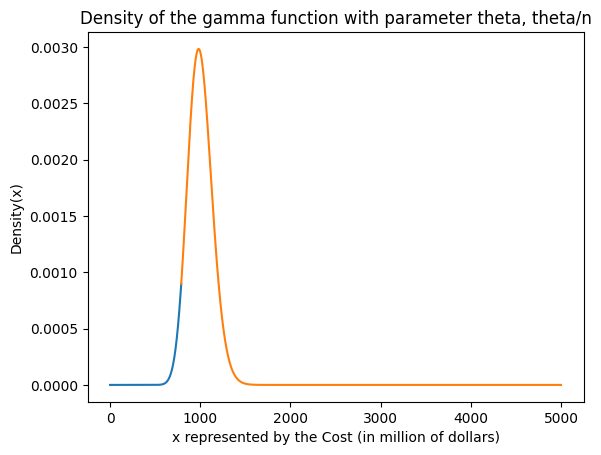

c = 789.0147974522822


In [18]:
alpha = 0.05
n = 55
theta_0 = 0.001


c = scipy.stats.gamma.ppf(q=alpha, a=n,loc=0, scale=(1/(n*theta_0)))

x_1 = np.linspace(0, c, 10000)
x_2 = np.linspace(c, 5000, 10000)

y_1 = scipy.stats.gamma.pdf(x_1, a=n, scale=(1/(n*theta_0)))
y_2 = scipy.stats.gamma.pdf(x_2, a=n, scale=(1/(n*theta_0)))

plt.plot(x_1, y_1)
plt.plot(x_2, y_2)


plt.title("Density of the gamma function with parameter theta, theta/n")
plt.xlabel("x represented by the Cost (in million of dollars)")
plt.ylabel("Density(x)")
plt.show()

print("c =", c)



In blue, this is the acceptance region, i.e. $\mathcal{H}_0$ is true in this region.

In orange, this is the rejection region, i.e. $\mathcal{H}_1$ is true in this region.

Q5)

The test is $\delta(X) = 1_{(\hat{g}(X)<c)}$,

Hence:

$\Diamond$ The level satisfies : $\alpha(\theta_0) = \mathbb{P}_{\theta_0} (\hat{g}(X)<c')$  

$\Diamond$ The power satisfies :  for $ \theta _1 \in \mathcal{H}_1 :\beta(\theta _1) = 1 - \mathbb{P}_{\theta _1}(\delta(X)=0) = 1 - \mathbb{P}_{\theta _1}(1_{(\hat{g}(X)<c')} = 0) = 1 - \mathbb{P}_{\theta _1}((\hat{g}(X)>c')) =  \mathbb{P}_{\theta _1} (\hat{g}(X)<c')$  

c_10 = 542.5405697091295
c_50 = 779.2946516501727
c_100 = 841.3927721831419
c_1000 = 948.5598493836511


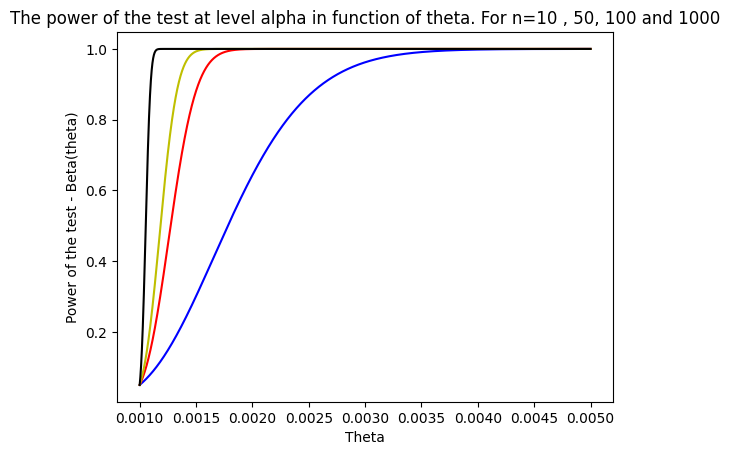

In [19]:
alpha = 0.05
n = 55
theta_0 = 0.001

theta_list = np.linspace(theta_0,0.005,300000) 


n_10 = 10
c_10 = scipy.stats.gamma.ppf(q=alpha, a=n_10,loc=0, scale=(1/(theta_0*n_10)))
beta_10 = scipy.stats.gamma.cdf(c_10, a=n_10, scale=(1/(theta_list*n_10)))
plt.plot(theta_list, beta_10, color='b')

n_50 = 50
c_50 = scipy.stats.gamma.ppf(q=alpha, a=n_50,loc=0, scale=(1/(theta_0*n_50)))
beta_50 = scipy.stats.gamma.cdf(c_50, a=n_50, scale=(1/(theta_list*n_50)))
plt.plot(theta_list, beta_50, color='r')

n_100 = 100
c_100 = scipy.stats.gamma.ppf(q=alpha, a=n_100,loc=0, scale=(1/(theta_0*n_100)))
beta_100 = scipy.stats.gamma.cdf(c_100, a=n_100, scale=(1/(theta_list*n_100)))
plt.plot(theta_list, beta_100, color='y')

n_1000 = 1000
c_1000 = scipy.stats.gamma.ppf(q=alpha, a=n_1000,loc=0, scale=(1/(theta_0*n_1000)))
beta_1000 = scipy.stats.gamma.cdf(c_1000, a=n_1000, scale=(1/(theta_list*n_1000)))
plt.plot(theta_list, beta_1000, color='k')

print("c_10 =",c_10)
print("c_50 =", c_50)
print("c_100 =", c_100)
print("c_1000 =", c_1000)

plt.title("The power of the test at level alpha in function of theta. For n=10 , 50, 100 and 1000")
plt.xlabel("Theta")
plt.ylabel("Power of the test - Beta(theta)")
plt.show()




Blue Curve : $n = 10$,

Red Curve : $n = 50$,

Yellow Curve : $n = 100$,

Black Curve : $n = 1000$.

Three remarks :

$\Diamond$ First Remark:

As expected, each curve takes the value $\alpha = 0.05$ at point $\theta = \theta _0 = 0.001$ Indeed, since $c(n) = Q_{n, \frac{\theta_0}{n}}(\alpha)$ we have $\beta(\theta _0) = P_{\theta_0} (\hat{g}(X)<c(n)) = \alpha = 0.05$ indepently of $n$.

$\Diamond$ Second Remark:

If we fix $\theta _1 \in \mathcal{H} _1$, we can see that the power $\beta(\theta _1)$ increases with $n$. Indeed, it's logic since when $n$ increases, we have many more samples and therefore the second risk diminishes and the estimation is better.

$\Diamond$ Third Remark:

If we fix $n$, we can see that the power $\beta(\theta _1)$ increases with  $\theta _1 \in \mathcal{H} _1$.

Indeed we can prove that by studying $ \forall \theta _1 \in [\theta_0;+\infty], \beta(\theta _1) = P_{\theta_1} (\hat{g}(X)<c(n)) = \int_0^{c(n)} \frac{\theta_1}{\Gamma(n)}\cdot (\theta_1 t)^{n-1}\cdot e^{-\theta_1 t } dt$

We have $\beta'(\theta _1) = \frac{\theta_1}{\Gamma(n)}\cdot (\theta_1 t)^{n-1}\cdot e^{-\theta_1 t } >0$

Hence $\beta'(\theta _1)$ is an  increasing function. Hence the third remark.


Q6)

Let $X_1$,...$X_n$ $\overset{iid}{\sim}$ $\mathcal{E(\theta)}$. We have $\mathbb{E}(X_i) = \frac{1}{\theta}$ and $\mathbb{V}(X_i) = \frac{1}{\theta^2}$.

Let $Y_n = \sqrt{n} \cdot \frac{\hat{g_n}(X) - \mathbb{E}(X_i)}{\sqrt{\mathbb{V}(X_i)}} = \sqrt{n}\theta\cdot(\hat{g_n}(X)-\frac{1}{\theta})$.

By the Central Limit Theorem, we have that $Y_n$ converges in law to $\mathcal{N}(0,1)$ as $n \rightarrow +\infty$.

Hence we can do that approximation that for $n$ large enough, $Y_n \sim \mathcal{N}(0,1)$.

Therefore the previous test can be written as : 

$\delta(x) = 1_{(\hat{g_n}(X)<c)}$

$\alpha = P_{\theta_0} (\hat{g_n}(X)<c) = P_{\theta_0} (Y_n<\sqrt{n}\theta_0\cdot(c-\frac{1}{\theta_0}))$ i.e $\sqrt{n}\theta_0\cdot(c-\frac{1}{\theta_0}) = Q_{0,1}(\alpha)$ 

Hence, $c = \frac{Q_{0,1}(\alpha)}{\sqrt{n}\cdot \theta_0} +\frac{1}{\theta_0}$ where, this time, $Q_{0,1}$ is the quantile function of $\mathcal{N}(0,1)$.

We note $c' = Q_{0,1}(\alpha)$

So that $\sqrt{n}\theta_0\cdot(c-\frac{1}{\theta_0}) = c'$

i.e $c = \frac{c'}{\sqrt{n}\cdot \theta_0} + \frac{1}{\theta_0}$

We suppose that $n=55$ is large enough to make the Central Limite Approximation. Let's compute c for $\theta_0 = 10^{-3}$.

Reference : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [20]:
from scipy.stats import norm

alpha = 0.05
n = 55
theta_0 = 0.001

c_prime = scipy.stats.norm.ppf(q=alpha, loc=0, scale=1)
print("c_prime =", c_prime)

c = c_prime/(np.sqrt(n) * theta_0) + 1/theta_0
print("c =", c)

g = sum(x)/n
print("g =", g)

if g<c :
    print("Test = ", 1)
    print("H_0 is rejected")
if g>c :
    print("Test = ", 0)
    print("H_0 is accepted")


c_prime = -1.6448536269514729
c = 778.2079821874304
g = 726.3363636363636
Test =  1
H_0 is rejected


We find that $\delta(X) = 1_{(\hat{g}(X)<c)}$ = 1

We can then reject $\mathcal{H}_0$

Since $\mathcal{H}_1= $ { $\theta>0 : \mathbb{E}_\theta(X) < 10^{3}$ }, 

It means that the expected cost of an accident is less than one billion dollars.

$_\square$

